In [1]:
import sys
import os
from dotenv import load_dotenv

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [2]:
from utils.dataset import get_data 

df = get_data()
df.head()

Loading data from wines: 8000it [00:00, 33405.34it/s]


,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


Cannot remove outliers from wine type because it is not numeric.


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'minerals'}>,
        <Axes: title={'center': 'calcium'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

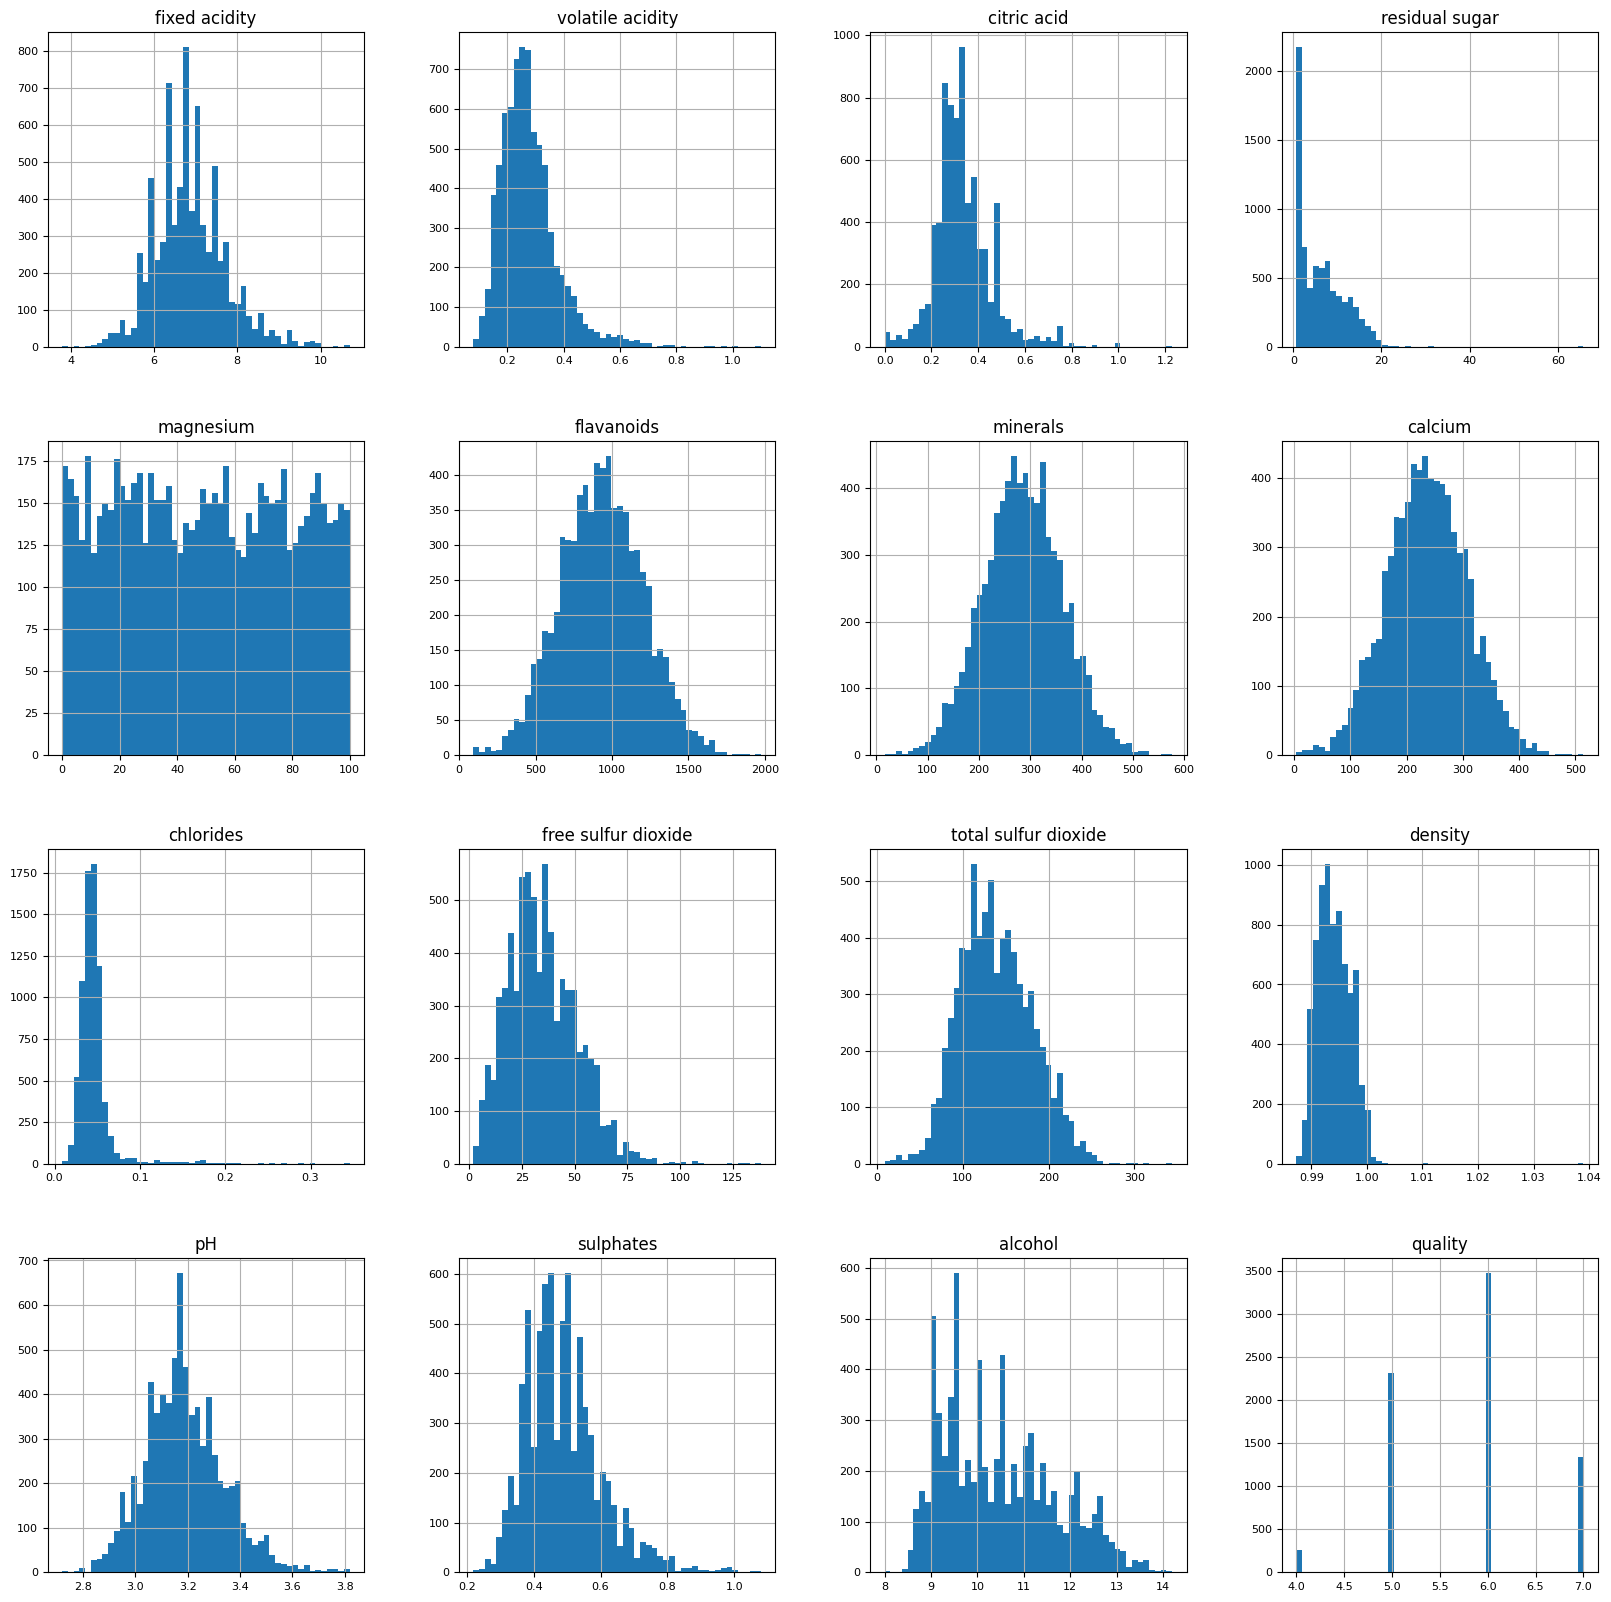

In [4]:
#removes outliers using IQR method
def remove_outliers_iqr(dataframe, column):
    if dataframe[column].dtype.kind in 'iufc':
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = dataframe.loc[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]
        return df_out
    else:
        print(f"Cannot remove outliers from {column} because it is not numeric.")
        return dataframe


df_out = df
for column in df.columns:
    df_out = remove_outliers_iqr(df, column)

# Histogram for all numeric columns
    # make it large enough to see the plot clearly
df_out.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

